In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

from sklearn.metrics import mean_absolute_error as mae

%matplotlib inline

In [2]:
df = pd.read_csv('./data/2018-to-2019-10-17-coinbase_BTC-EUR_86400.csv', parse_dates=['Date'])
df.tail()

,Date,Low,High,Open,Close,Volume BTC
649,2019-10-12 02:00:00,7490.27,7628.98,7495.00,7539.19,310.041026
650,2019-10-13 02:00:00,7377.86,7685.00,7540.61,7527.01,632.503953
651,2019-10-14 02:00:00,7470.00,7635.75,7525.50,7579.09,565.736628
652,2019-10-15 02:00:00,7347.00,7633.37,7579.08,7400.26,819.685663
653,2019-10-16 02:00:00,7165.21,7421.30,7400.50,7228.57,909.162382


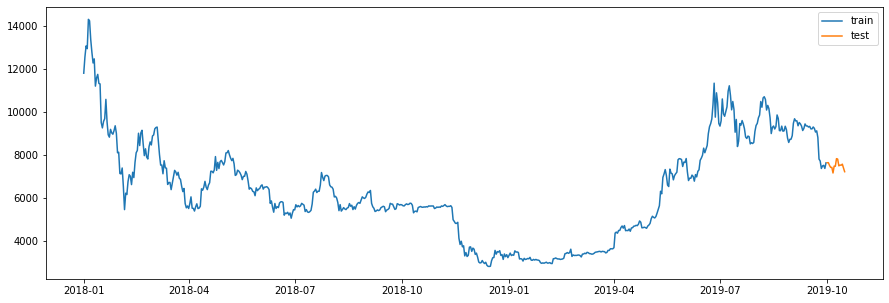

In [5]:
train = df[ df.Date < '2019-10-01' ]
test = df[ df.Date >= '2019-10-01' ]

plt.figure(figsize=(15,5))
plt.plot( train.Date, train.Close, label='train' )
plt.plot( test.Date, test.Close, label='test' )
plt.legend();

## Prophet

In [6]:
fb_df = train[['Date','Close']].copy()
fb_df.columns = ['ds','y']

fb_df.head()

,ds,y
0,2018-01-01 01:00:00,11799.98
1,2018-01-02 01:00:00,12545.01
2,2018-01-03 01:00:00,13065.62
3,2018-01-04 01:00:00,12940.00
4,2018-01-05 01:00:00,14300.00


In [7]:
m = Prophet()
%time m.fit(fb_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


CPU times: user 270 ms, sys: 0 ns, total: 270 ms
Wall time: 285 ms


In [8]:
future_periods = len(test)
future_periods

16

In [9]:
%time future = m.make_future_dataframe(periods=future_periods, freq='D', include_history=False)

future.head()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.03 ms


,ds
0,2019-10-01 02:00:00
1,2019-10-02 02:00:00
2,2019-10-03 02:00:00
3,2019-10-04 02:00:00
4,2019-10-05 02:00:00


In [10]:
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-10-01 02:00:00,10364.852601,9172.628653,11601.731550,10364.852601,10364.852601,50.039801,50.039801,50.039801,45.262693,45.262693,45.262693,4.777107,4.777107,4.777107,0.0,0.0,0.0,10414.892401
1,2019-10-02 02:00:00,10391.669310,9186.421783,11682.406060,10391.669310,10391.669310,38.245447,38.245447,38.245447,45.262693,45.262693,45.262693,-7.017246,-7.017246,-7.017246,0.0,0.0,0.0,10429.914757
2,2019-10-03 02:00:00,10418.486019,9178.900609,11654.384177,10418.486019,10418.486019,-4.208405,-4.208405,-4.208405,45.262693,45.262693,45.262693,-49.471098,-49.471098,-49.471098,0.0,0.0,0.0,10414.277613
3,2019-10-04 02:00:00,10445.302728,9254.685352,11657.984460,10445.302728,10445.302728,55.111612,55.111612,55.111612,45.262693,45.262693,45.262693,9.848919,9.848919,9.848919,0.0,0.0,0.0,10500.414340
4,2019-10-05 02:00:00,10472.119437,9368.811152,11776.764755,10472.022821,10472.165730,73.618364,73.618364,73.618364,45.262693,45.262693,45.262693,28.355671,28.355671,28.355671,0.0,0.0,0.0,10545.737801


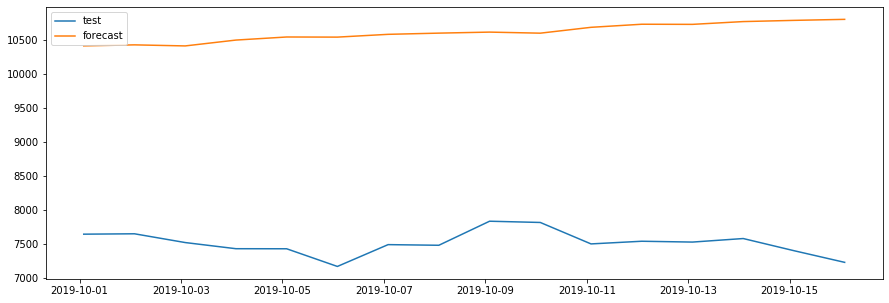

In [11]:
plt.figure(figsize=(15,5))
#plt.plot( train.Date, train.Close, label='train' )
plt.plot( test.Date, test.Close, label='test' )
plt.plot( forecast.ds, forecast.yhat, label='forecast' )
plt.legend();

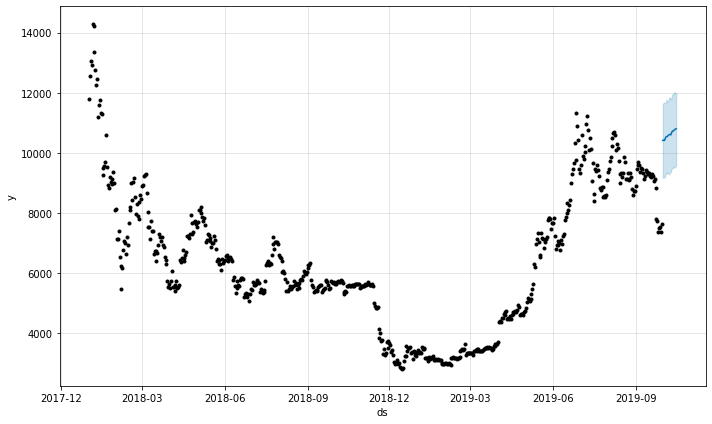

In [12]:
m.plot(forecast);